# Progetto Data Analytics - Diabetes prediction
**Studente**: Nicola Vacalebre

**Docente**: Luciano CAROPRESE, Roberto NARDONE

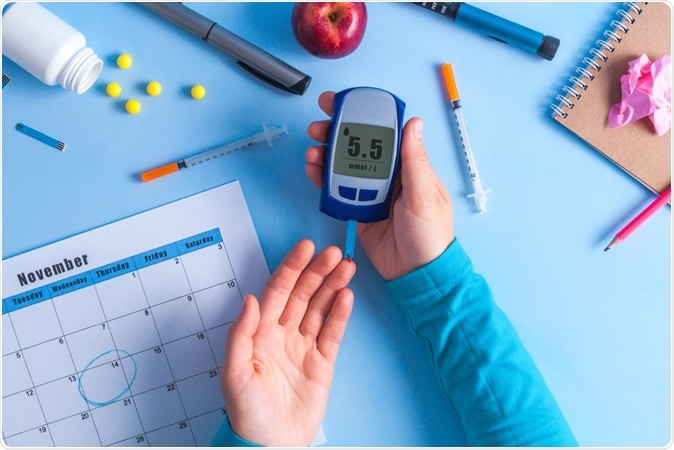

#**Descrizione del dataset e del task**
Il seguente progetto si pone l'obiettivo di andare a realizzare, a partire da un dataset costituito da un insieme di features, un classificatore binario.

Il dataset è stato prelevato dal National Institute of Diabetes and Digestive and Kidney Diseases. Si vuole quindi prevedere sulla base di misurazioni diagnostiche (incluse nel set di dati) l'insorgenza del diabete mellito.
La variabile diagnostica a valore binario esaminata mostra se il paziente presenta segni di diabete secondo i criteri dell'Organizzazione Mondiale della Sanità (ovvero livelli di glicemia superiori ai 200 mg/dl)

Sono stati posti diversi vincoli alla selezione di queste istanze da un database più ampio. In particolare, tutti i pazienti qui analizzati sono donne di almeno 21 anni di origine indiana.

Vengono considerati per l'analisi i seguenti parametri:

* **Gravidanza (Pregnancies)**: Numero di volte in gravidanza 
* **Glucosio (Glucose)**: Concentrazione di glucosio plasmatico rilveato dopo 2 ore da un test orale di tolleranza al glucosio 
* **Pressione sanguigna (BloodPressure)**: Pressione sanguigna diastolica (mm Hg) ovvero la pressione nelle arterie quando il cuore riposa tra un battito e l'altro. Rappresenta il momento in cui il cuore si riempie di sangue e riceve ossigeno. Una normale pressione diastolica è inferiore a 80. Una lettura di 90 o superiore significa che la pressione è alta.
* **SkinThickness**: Spessore della piega cutanea del tricipite (mm); per le donne valori normali standard per le pieghe cutanee del tricipite sono di 18,0 mm
* **Insulina (Insulin)**: Insulina sierica dopo 2 ore (mu U/ml)
* **BMI**: Indice di massa corporea (peso in kg/(altezza in m)^2); le categorie di stato del peso standard associate agli intervalli di BMI per gli adulti sono mostrate nella tabella seguente:

 * Sotto 18,5 -> Sottopeso
 * 18.5 – 24.9 -> Peso normale o sano
 * 25.0 – 29.9 -> Sovrappeso
 * 30.0 e oltre -> Obesi
* **DiabetesPedigreeFunction**: Funzione che valuta la probabilità di contrarre il diabete in base alla storia familiare
* **Età (Age)**: Età 
* **Risultato (Outcome)**: Variabile di classe (0 o 1) intesa come assenza (0) o presenza (1) patologia 'Diabete'

Le variabili predittive includono quindi il numero di gravidanze che la paziente ha avuto, il suo BMI, il livello di insulina, l'età e così via.

Costruiamo un modello di apprendimento automatico per prevedere con precisione se i pazienti nel set di dati hanno o meno il diabete.

I risultati possono essere classificati come normali, alterati o anormali.

* Risultati normali per il diabete -> Livello di glucosio a due ore inferiore a 140 mg/dL

* Risultati alterati per il diabete -> Livello di glucosio a due ore da 140 a 200 mg/dL

* Risultati anomali (diagnostici) per il diabete -> Livello di glucosio a due ore superiore a 200 mg/dL

**Obiettivo**: realizzare un classificatore binario che discrimina le ragazze che hanno il diabete da chi non lo ha.

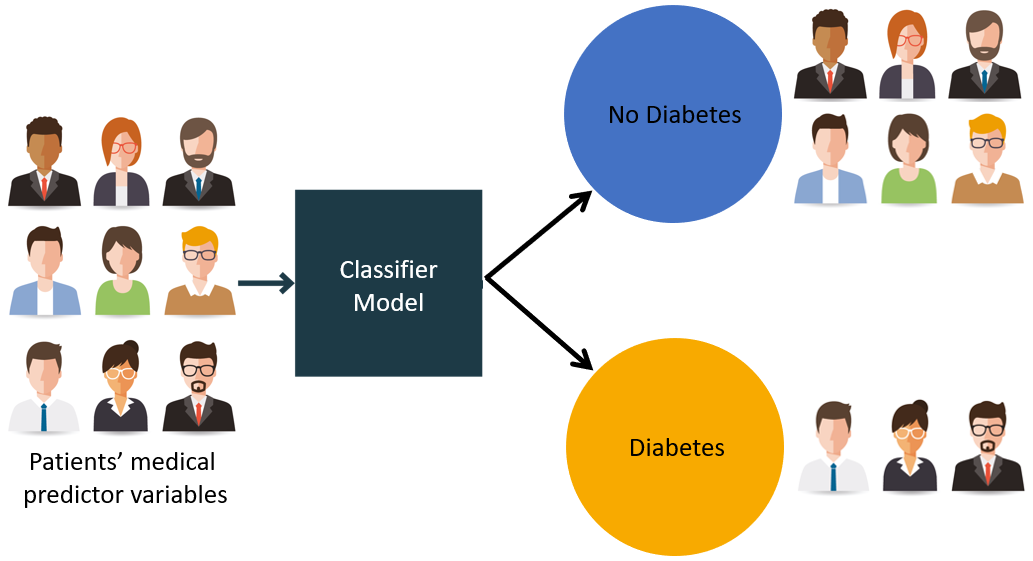

# Presentazione dei dati
### Librerie utilizzate per i dati

Importiamo le librerie necessarie per iniziare, altre verranno importate in seguito quando opportuno:


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
from google.colab import files
import re
import sklearn
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Librerie utilizzate per gli algoritmi di machine learning

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import *
from tensorflow import *
from keras import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import metrics

###Caricamento dataset
Carichiamo il nostro dataset all'interno di una variabile **"df"** e procediamo a leggerlo mostrando le sue prime 5 entry attraverso il comando **head()**:

 



In [ ]:
import os
 
filename = 'diabetes.csv'
if os.path.isfile(filename) and os.access(filename, os.R_OK):
    print("Il file è già presente")
    df = pd.read_csv('diabetes.csv')
else:
    print("File non trovato! Si prega di inserire il file")
    file_caricato = files.upload()
    df = pd.read_csv('diabetes.csv')


File non trovato! Si prega di inserire il file


Saving diabetes.csv to diabetes.csv


In [ ]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Verifico la tipologia di dati:


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Operazioni preliminari sul dataset ed esplorazione dei dati
Verifichiamo il numero di entry:



In [ ]:
df.shape


(768, 9)

Il dataset è quindi composto da 768 Record e 9 Features





Al fine di rendere i dati maggiormente leggibili modifico il nome della colonna "Outcome" (che rappresenta la positività/negatività alla patologia) in "Diabetes":

In [ ]:

df_copy= df
df_copy['Diabetes'] = df_copy['Outcome'] 
df_copy = df_copy.drop(['Outcome'], axis=1)
df_copy.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Controlliamo la presenza di valori mancanti nel dataset:



In [ ]:
df_copy.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

Possiamo notare che il dataset non presenta celle con valori nulli, procediamo quindi con la descrizione del dataset.

Il comando **describe()** mostra una tabella con i dettagli di ogni colonna, in particolare:

* Il numero di entry
* la media
* lo scarto quadratico medio
* il valore minimo di ciascuna feature
* i quartili
* il valore massimo

Questa funzione permette di leggere alcune informazioni inportanti riguardo il dataset utilizzato.


In [ ]:
df_copy.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


È possibile notare come numerosi campi presentino un valore pari a 0, ciò vuol dire che quel particolare dato non è stato oggetto di misurazione nel paziente. Per questi motivi rimpiazziamo inizialmente questi dati con valori nulli 0 --> Nan.

Ricontrolliamo quindi la presenza di valori nulli nel dataset: 

In [ ]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Diabetes                      0
dtype: int64


Alcune features presentano dei valori nulli, ciò non sarebbe un problema ad esempio nel caso del numero di gravidanze, poichè è ovviamente possibile che non se ne abbiano avute.
Negli altri casi (Glucose,Blood Pressure, SkinThickness,Insulin,BMI) invece andremo a sostituire i campi uguali a zero con il valore medio o la mediana a seconda dei casi.


Calcoliamo la proporzione di valori pari a zero in ciascuna funzione:

In [ ]:
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = df_copy['Glucose'].count()

for feature in zero_features:
    zero_count = df_copy[df_copy[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 111, percent is 14.55 %
Glucose 0 number of cases 0, percent is 0.00 %
BloodPressure 0 number of cases 0, percent is 0.00 %
SkinThickness 0 number of cases 0, percent is 0.00 %
Insulin 0 number of cases 0, percent is 0.00 %
BMI 0 number of cases 0, percent is 0.00 %


Procediamo con la sostituzione dei valori nulli:

In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
print(df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64


Procediamo a rilanciare quindi il comando describe():

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


Andiamo a leggere i dati dal punto di vista grafico andando ad esempio a visualizzare il numero di persone diabetiche riscontrate per ciascuna fascia d'età:

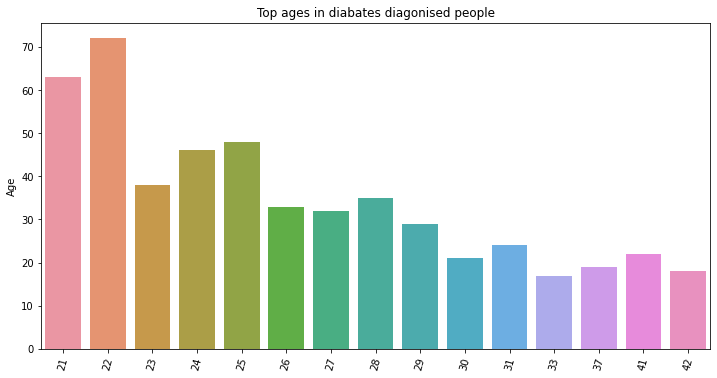

In [ ]:
top_age = df.Age.value_counts().head(15)
top_age
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top ages in diabates diagonised people')
sns.barplot(x=top_age.index, y=top_age)

## Distribuzione delle features
La densità (o distribuzione) dei dati è un controllo critico che ci aiuta a capire come vengono distribuiti i nostri dati. 
I grafici a seguire mostrano la distribuzione delle caratteristiche.
Tracciamo uno historygram per tutte le nostre caratteristiche: 


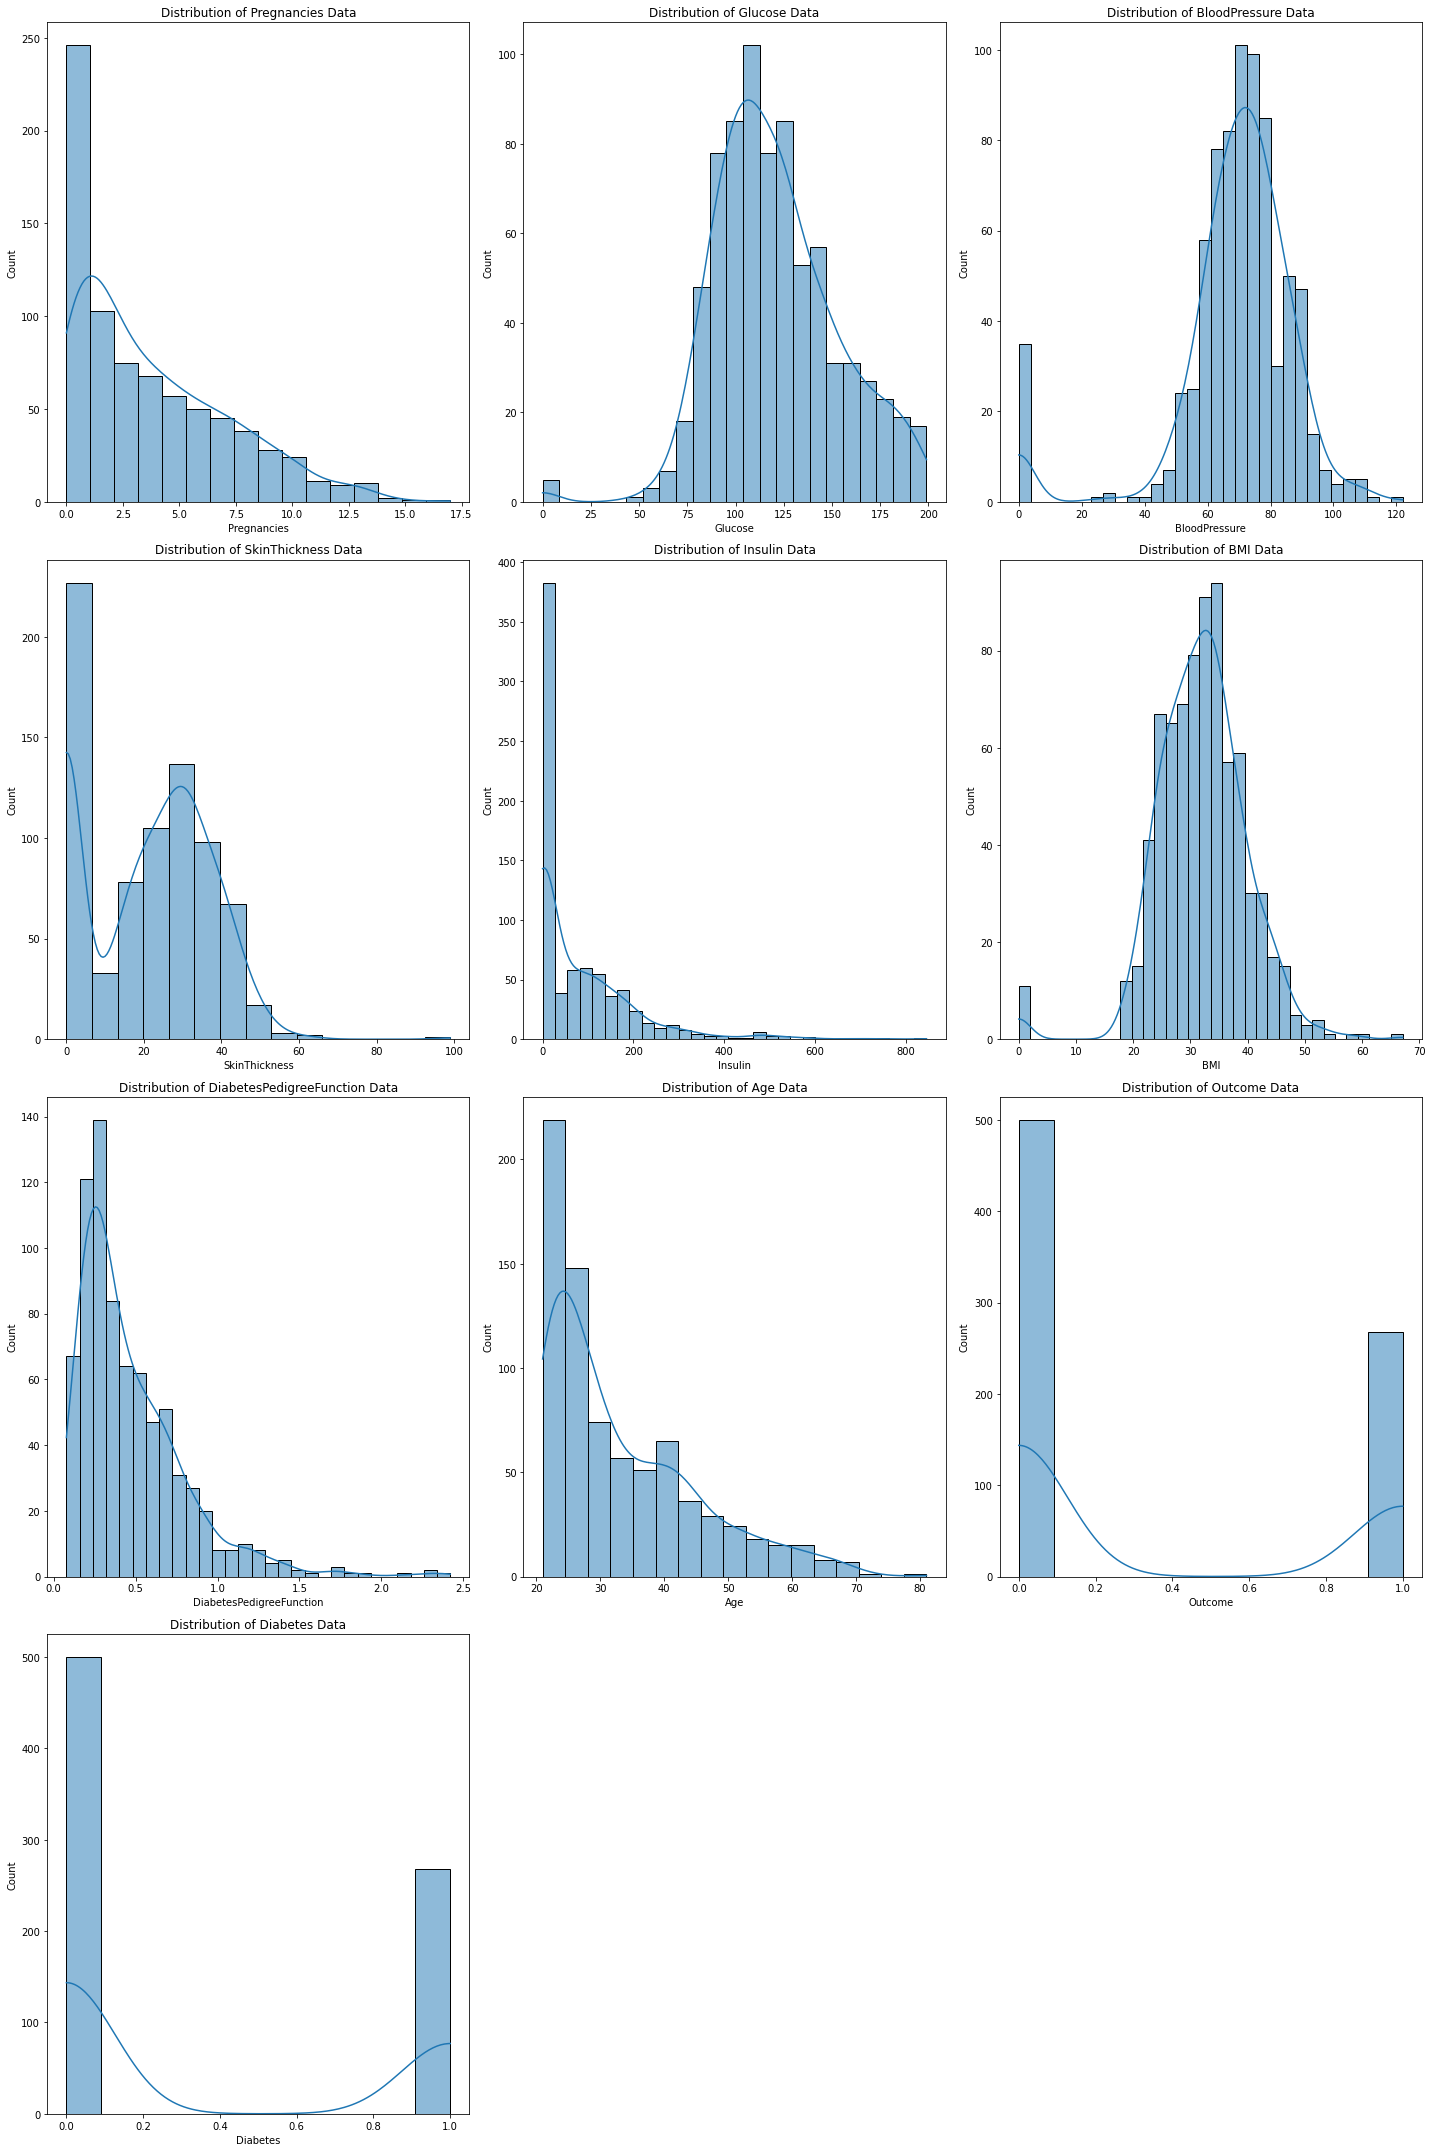

In [ ]:
plt.figure(figsize=(20,30))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

Dai plot precedenti possiamo notare che le caratteristiche di glucosio, pressione sanguigna e BMI hanno una distribuzione normale. Ciò significa che i dati sono sparsi attorno al valore medio per tutte queste funzionalità.
Nella colonna Diabetes possiamo vedere che le persone senza diabete, ovvero 0, sono quasi il doppio di quelle delle persone con diabete. Ciò significa che i nostri dati hanno uno squilibrio di classe e inoltre altre colonne presentano dei dati un pò distorti. 





## Matrice di Correlazione
Il plot seguente mostra invece la matrice di correlazione, essa rappresenta l'indice di correlazione di due colonne partendo da un minimo di -1 per le colonne correlate negativamente, fino a un massimo di 1 per le colonne altamente correlate. È una matrice che permette di valutare la correlazione tra le varie features.
Qualora due colonne avessero una correlazione pari a 1, una delle due potrebbe essere rimossa.


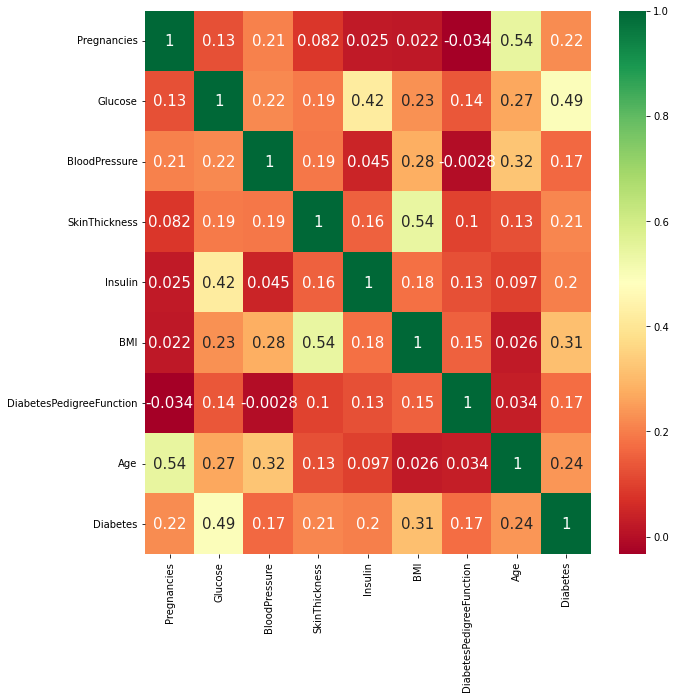

In [ ]:
matrice_correlazione = df_copy.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matrice_correlazione, cbar = True, annot=True, cmap ='RdYlGn',annot_kws={'size': 15})

Dalla heatmap possiamo vedere che ci sono alcune caratteristiche che hanno una lieve correlazione con l'Outcome (Diabetes) quali ad esempio il livello di glucosio e BMI. Le altre caratteristiche presentano invece una correlazione debole.

Nel nostro caso poichè non sembrano esserci valori significativamente correlati, nel dataset non verrà rimossa alcuna colonna.

L'ultima operazione che andiamo a svolgere è il conteggio delle etichette, ossia la percentuale di pazienti con diabete (indicate con 1) e percentuale di pazienti sani (indicate con 0):



In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = df_copy['Diabetes'].value_counts()/df_copy['Diabetes'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Diabetes")
fig.show()

pazienti_con_diabete = len(df.loc[df['Diabetes'] == 1])
pazienti_sani = len(df.loc[df['Diabetes']== 0])

print('pazienti con diabete: ', pazienti_con_diabete)
print('pazienti sani: ', pazienti_sani)
print('Numero totale di campioni: ', df['Diabetes'].shape[0])


pazienti con diabete:  268
pazienti sani:  500
Numero totale di campioni:  768


Come detto in precedenza la colonna Diabetes che mostra il risultato è sbilanciata. Il numero di persone che non hanno il diabete è in proporzione maggiore rispetto al numero di persone che hanno il diabete.

# Separazione del dataset
Dividiamo il nostro dataset in due subset (training e test set). In quanto la nostra label è un classificatore binario, è necessario utilizzare la divisione stratificata nella colonna Diabetes per garantire che i dati di test e training abbiano una proporzione uguale di queste classi per risultati ottimali . 
Il parametro Stratify effettua questa suddivisione in modo che la proporzione di valori nel campione prodotto sia la stessa proporzione di valori forniti per la stratificazione del parametro.
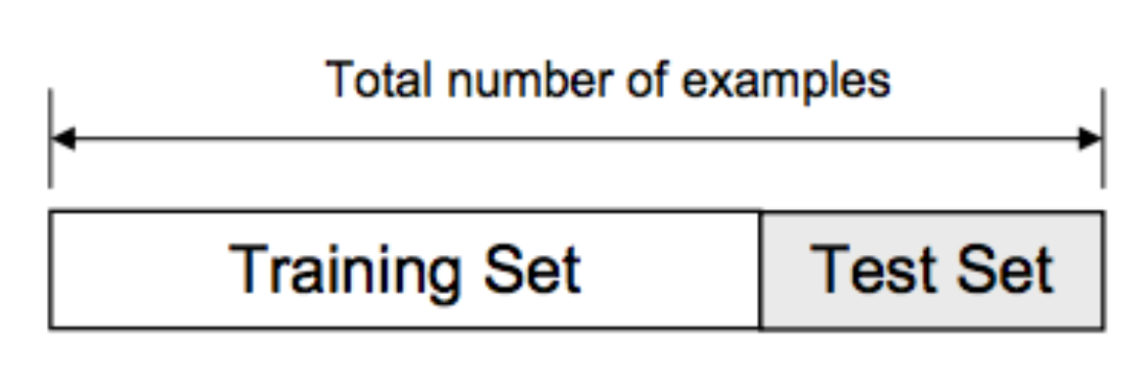
Il dataset verrà suddiviso con un rapporto di 80-20.

In [ ]:
from sklearn.model_selection import train_test_split
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' ,'Age']
target = ['Diabetes']
X=df_copy[features]
y=df_copy[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)


In [ ]:
print('Dimensione training set:',len(X_train)) 
print('Dimensione test set:',len(X_test))

Dimensione training set: 576
Dimensione test set: 192


#Feature Scaling
Lo scaling mi permette di normalizzare il range di variazione delle feature di un dataset.

Possiamo osservare dai grafici che varie funzioni hanno valori di input che variano su scale diverse. Per garantire che un valore di una feature non influisca sul modello più di un'altra con valori inferiori, è necessario normalizzare i valori in modo che abbiano un ridimensionamento appropriato, in particolare la standardizzazione delle features fa sì che i valori di ciascuna caratteristica nei dati abbia media zero e varianza unitaria.
Usiamo per tale scopo la funzione **StandardScaler**.

L'operazione di scaling, avendo a che fare con algoritmi per cui è necessario normalizzare i dati, si rende necessaria dal momento in cui l’intervallo di valori dei dati del dataset varia notevolmente, portando ad avere risultati fuorvianti senza la normalizzazione.

L'operazione di standardizzazione dei nostri dati viene effettuata dopo il data-split per prevenire il fenomeno del Data Leak dal test-set al train-set.


In [ ]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

#Algoritmi di machine learning per la classificazione
Come algoritmi di machine learning si è scelto di utilizzare:

*   Regressione logistica
*   K-neighbougs 
*  Decision Tree Algoritm
*  Random Forest   
*   Support vector machines 


Per ciascuno di essi verrà testato il modello e verranno stampati i rispettivi valori di accuratezza. Per effettuare un analisi più dettagliata e per sapere dove sbaglia il modello verrà utilizzata la funzione **classification_report()**. Essa effettua un confronto tra le previsioni e i risultati corretti producendo una reportistica molto più dettagliata.
In una sola schermata visualizza la precisione (precision), il recall e l'f1-score per ogni classe. Nella colonna support è indicato il numero degli esempi di ogni classe, mentre nella parte bassa del report sono visualizzati i dati sintetici per tutte le classi.

Per saperne di più sugli errori del modello verrà stampata anche la matrice di confusione. Si tratta di uno strumento grafico della libreria scikitplot. Elaboro la matrice di confusione con la funzione **plot_confusion_matrix()** passandogli il vettore delle predizioni X_test e delle risposte corrette y_test.
Sulle colonne sono indicate le classi previste dal modello (Predicted label) mentre sulle righe le classi corrette (Actual label) del dataset. La diagonale principale della matrice indica le previsione corrette del modello mentre le altre celle indicano le previsioni sbagliate.

#Regressione logistica

In [ ]:
rl = LogisticRegression()
rl.fit(X_train,y_train.values.ravel())
rl_pred = rl.predict(X_test)
rl_acc = accuracy_score(y_test, rl_pred)

In [ ]:
print('Accuratezza : ', '{:.2f}%'.format(100 * rl_acc))


Accuratezza :  75.52%


In [ ]:
print(classification_report(y_test, rl_pred))


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       125
           1       0.72      0.49      0.58        67

    accuracy                           0.76       192
   macro avg       0.74      0.69      0.71       192
weighted avg       0.75      0.76      0.74       192



Text(0.5, 24.0, 'Predicted label')

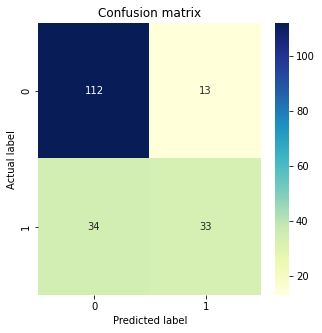

In [ ]:
y_pred = rl.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize = (5,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')



plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# K-neighbours


In [ ]:
kn = KNeighborsClassifier(n_neighbors=11)
kn.fit(X_train,y_train.values.ravel())
kn_pred = kn.predict(X_test)
kn_acc = accuracy_score(y_test,kn_pred)

In [ ]:
print('Accuratezza : ', '{:.2f}%'.format(100 * kn_acc))


Accuratezza :  79.17%


In [ ]:
print(classification_report(y_test, kn_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       125
           1       0.76      0.58      0.66        67

    accuracy                           0.79       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.79      0.79      0.78       192



Text(0.5, 24.0, 'Predicted label')

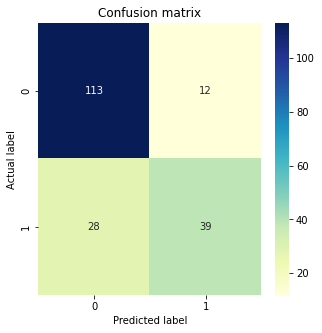

In [ ]:
y_pred = kn.predict(X_test)
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Decision Tree Classifier

In [ ]:
dtc=DecisionTreeClassifier()
dtc=dtc.fit(X_train,y_train)
pred1=dtc.predict(X_test)
dtc_acc=metrics.accuracy_score(y_test, pred1)
print('Accuratezza : ', '{:.2f}%'.format(100 * dtc_acc))

Accuratezza :  70.83%


In [ ]:
print(classification_report(y_test, pred1))


              precision    recall  f1-score   support

           0       0.76      0.80      0.78       125
           1       0.59      0.54      0.56        67

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.70      0.71      0.70       192



Text(0.5, 24.0, 'Predicted label')

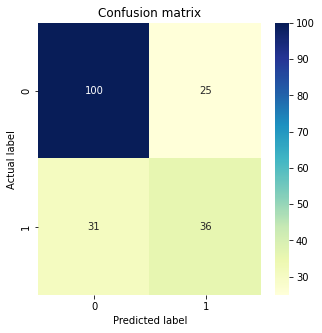

In [ ]:
y_pred = dtc.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize = (5,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,
                                   max_features = 'auto', max_depth = 10)
ranfor.fit(X_train, y_train)
pred_ranfor = ranfor.predict(X_test)
ranfor_acc=accuracy_score(y_test, pred_ranfor)
print('Accuratezza : ', '{:.2f}%'.format(100 * ranfor_acc))


Accuratezza :  77.08%


In [ ]:
print(classification_report(y_test, pred_ranfor))


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       125
           1       0.71      0.58      0.64        67

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



Text(0.5, 24.0, 'Predicted label')

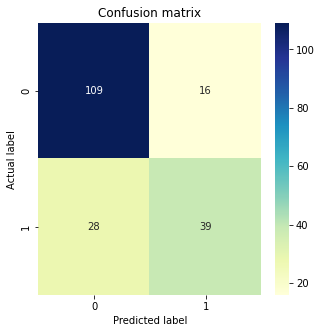

In [ ]:
y_pred = ranfor.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# SVM

Per quanto riguarda le Support-Vector Machine è stato scelto di utilizzare il metodo Kernel lineare:

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
pred_svm = sv.predict(X_test)
svm_acc=accuracy_score(y_test, pred_svm)
print('Accuratezza : ', '{:.2f}%'.format(100 * svm_acc))


Accuratezza :  74.48%


In [ ]:
print(classification_report(y_test, pred_svm))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       125
           1       0.70      0.48      0.57        67

    accuracy                           0.74       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.74      0.74      0.73       192



Text(0.5, 24.0, 'Predicted label')

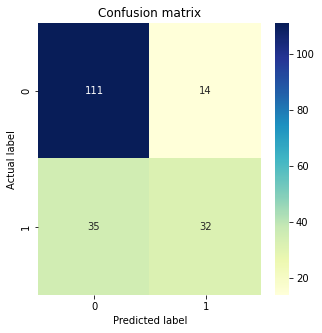

In [ ]:
y_pred = sv.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Rete neurale (Deep learning)
Realizziamo una rete neurale in grado di effettuare la classificazione binaria del modello preso in esame.

Creiamo il modello e procediamo con l'addestramento attraverso l'operazione di fit.


In [ ]:
model= Sequential()

model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


Definiamo i parametri per l'addestramento: numero di epoche, dimensione del batch, dimensione validation_set, ottimizzatore, funzione di perdità.

Per quanto riguarda la funzione di perdita utilizzeremo la Binary_crossentropy visto che stiamo affrontando un problema di classificazione binaria.

L'algoritmo di ottimizzazione utilizzato è Adam, si basa sulla discesa del gradiente; la metrica infine di cui terremmo conto durante l'addestramento è l'accuratezza.

Una volta definiti i predetti iperparametri sarà possibile addestrare il modello.


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=10,verbose=1,validation_split=0.2)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
46/46 [==============================] - 1s 6ms/step - loss: 0.6736 - accuracy: 0.6478 - val_loss: 0.6084 - val_accuracy: 0.6897
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.6478 - val_loss: 0.5595 - val_accuracy: 0.6724
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.6587 - val_loss: 0.5290 - val_accuracy: 0.6810
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.6696 - val_loss: 0.5099 - val_accuracy: 0.6810
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.6913 - val_loss: 0.4956 - val_accuracy: 0.7155
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7217 - val_loss: 0.4846 - val_accuracy: 0.7414
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7391 - val_loss: 0.4769 - val_accuracy: 0.7586
Epoch 8/50
46/46 [==

Analizziamo i risultati dai plot:

In [ ]:
train_loss = history.history['loss']
val_loss = history.history ['val_loss']
train_acc = history.history ['accuracy']
val_acc = history.history ['val_accuracy']

Text(0.5, 1.0, 'Accuratezza training e validation')

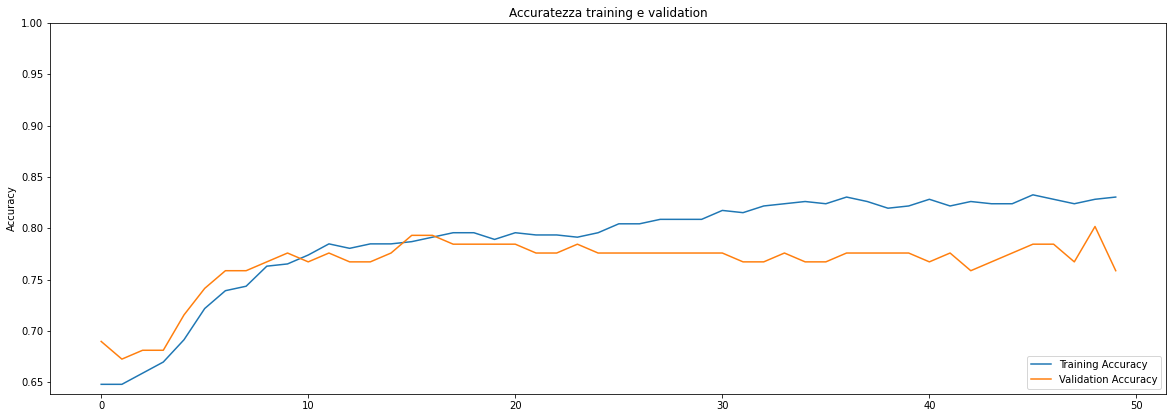

In [ ]:
plt.figure (figsize=(20,15))
plt.subplot(2,1,1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Accuratezza training e validation')

Text(0.5, 1.0, 'Loss di training e validation')

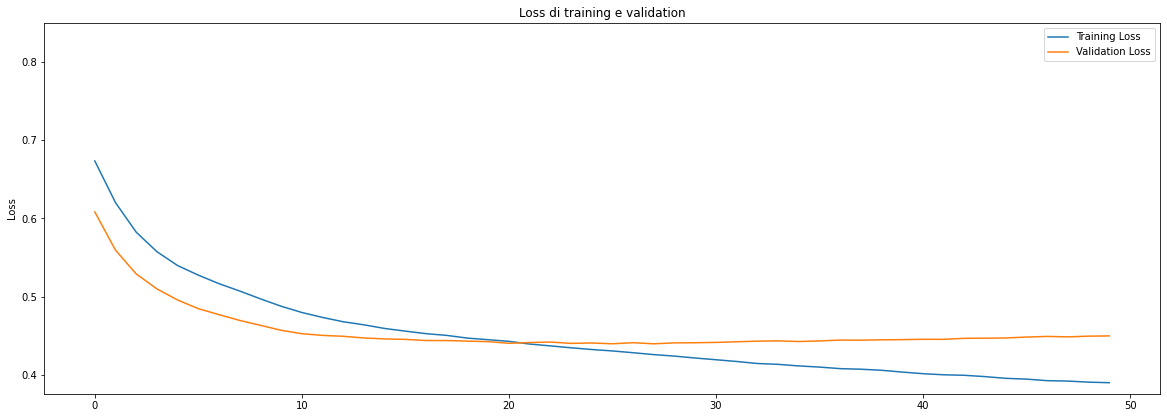

In [ ]:
plt.figure (figsize=(20,15))
plt.subplot(2,1,2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),0.85])
plt.title('Loss di training e validation')

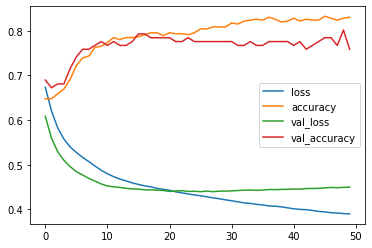

In [ ]:
hgraph=pd.DataFrame(history.history)
hgraph.plot()

Sulla base dei risultati poco soddisfacenti ottenuti,  infatti il livello di accuracy è solamente il 68.75%,  procediamo a migliorare il modello aumentando il numero di epoche ed utilizzando l'**EarlyStopping**, che ci permette di interrompere il training quando una quantità monitorata, nel nostro caso la "validation_loss" smette di migliorare, per prevenire un'eventuale situazione di Overfitting:

Procediamo ad addestrare nuovamente il modello:

In [ ]:
model= Sequential()

model.add(Dense(12, activation='relu', input_dim=8))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping=keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2, callbacks=[early_stopping])
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
46/46 [==============================] - 1s 6ms/step - loss: 0.7003 - accuracy: 0.5717 - val_loss: 0.6570 - val_accuracy: 0.6724
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6739 - val_loss: 0.6091 - val_accuracy: 0.7155
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7130 - val_loss: 0.5681 - val_accuracy: 0.7500
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.7478 - val_loss: 0.5323 - val_accuracy: 0.7759
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7630 - val_loss: 0.5002 - val_accuracy: 0.7931
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7565 - val_loss: 0.4802 - val_accuracy: 0.8103
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7630 - val_loss: 0.4728 - val_accuracy: 0.7931
Epoch 8/100
4

Effettuiamo nuovamente il plotting dei dati:

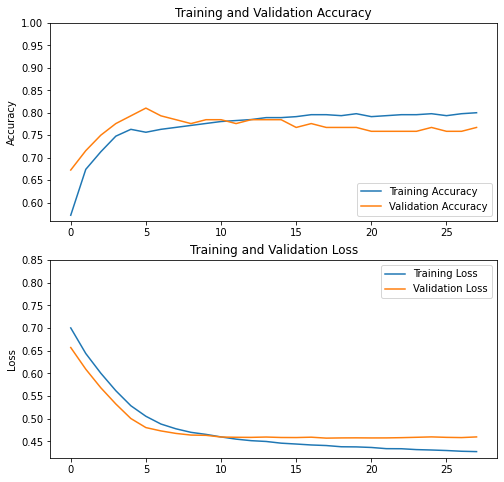

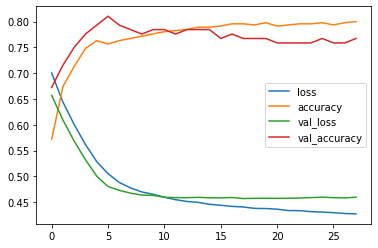

In [ ]:
train_loss = history.history['loss']
val_loss = history.history ['val_loss']
train_acc = history.history ['accuracy']
val_acc = history.history ['val_accuracy']

plt.figure (figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),0.85])
plt.title('Training and Validation Loss')

hgraph=pd.DataFrame(history.history)
hgraph.plot()

Dai precedenti grafici è possibile valutare l'andamento del modello, possiamo vedere come le prestazioni siano comparabili per quanto riguarda sia "loss" che "accuracy" valutate su entrambe i set di dati, training e validation.
Soffermandoci sulla "loss" è possibile notare come al momento il modello non soffra di overfitting, questo sicuramente per via del numero di epoche scelto.
L'accuratezza finale ottenuta è del 77.08%, un risultato tutto sommato accettabile per via delle ridotte dimensioni del dataset di partenza.


# Confronto tra i vari modelli


Concludiamo confrontando l'accuratezza dei vari modelli ottenuti:



In [ ]:
d = {'Model': ['Regressione Logistica', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVM', 'Rete Neurale'],
     'accuracy' : [  rl_acc*100, kn_acc*100,  dtc_acc*100, ranfor_acc*100, svm_acc*100, accuracy*100]}

result_df = pd.DataFrame(data = d)
result_df

,Model,accuracy
0,Regressione Logistica,75.520833
1,KNeighborsClassifier,79.166667
2,DecisionTreeClassifier,70.833333
3,RandomForestClassifier,77.083333
4,SVM,74.479167
5,Rete Neurale,77.083331


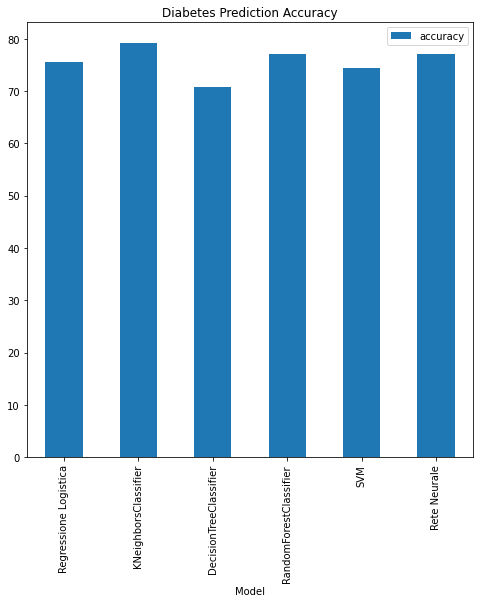

In [ ]:
result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8,8), title='Diabetes Prediction Accuracy', 
               sort_columns=True)

Tra i modelli utilizzati sicuramente quelli di maggior interesse e che presentano livelli di accuratezza maggiori sono il KNeighborsClassifier,la Rete Neurale e il RandomForest. 
Anche se comunque i livelli di accuratezza si aggirano tutti intorno al 74-77%.

I risultati ottenuti risentono sicuramente del ridotto numero di persone monitorate (768) e della presenza di numerosi valori mancanti nel dataset di partenza; ad esempio la misurazione dell'insulina risultava mancante in 374 pazienti su 768 presi in esame.
Sicuramente è possibile ottenere risultati migliori aumentando il numero di persone oggetto dello studio e approfondendo l'anamnesi per ogni paziente, in modo da avere più parametri per addestrare il modello.

In conclusione, in ambito sanitario un sistema di questo tipo può ritenersi un valido alleato nella scoperta della patalogia, vista comunque la semplicità delle feature immesse nel sistema.
Essendo il campo di utilizzo molto delicato per un predittore di questo tipo, bisognerebbe concentrarsi nello sviluppo di un modello che dia il più basso numero di False-Negative possibile. 